In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import tensorflow_decision_forests as tfdf

In [2]:
## Specify file name and directory for the dataset. ##
directory = './data/';
file = 'attrition.xlsx';

In [3]:
## Read file from the directory and transform into pandas dataframe ##
def read_data(file, directory):
    filename = directory + file;
    df = pd.read_excel(filename);
    
    return df;

In [4]:
## Read in the excel file into a pandas dataframe. ##
df = read_data(file, directory);

In [5]:
## Print dataframe. ##
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
## Instantiate new column names for each header. ##
new_columns = {
    "Age": "age",
    "Attrition": "attrition",
    "BusinessTravel": "travel",
    "DailyRate": "daily_rate",
    "Department": "department",
    "DistanceFromHome": "distance_home",
    "Education": "education",
    "EducationField": "education_field",
    "EmployeeCount": "emp_count",
    "EmployeeNumber": "emp_number",
    "EnvironmentSatisfaction": "env_satisfaction",
    "Gender": "gender",
    "HourlyRate": "hour_rate",
    "JobInvolvement": "job_involvement",
    "JobLevel": "job_level",
    "JobRole": "job_role",
    "JobSatisfaction": "job_satisfaction",
    "MaritalStatus": "marital_status",
    "MonthlyIncome": "monthly_income",
    "MonthlyRate": "month_rate",
    "NumCompaniesWorked": "companied_worked_number",
    "Over18": "over_18",
    "OverTime": "overtime",
    "PercentSalaryHike": "salary_hike",
    "PerformanceRating": "performance_rating",
    "RelationshipSatisfaction": "relationship_satisfaction",
    "StandardHours": "hours",
    "StockOptionLevel": "stock_option",
    "TotalWorkingYears": "total_working_yrs",
    "TrainingTimesLastYear": "training_times",
    "WorkLifeBalance": "wl_balance",
    "YearsAtCompany": "years_at_company",
    "YearsInCurrentRole": "years_current_role",
    "YearsSinceLastPromotion": "years_last_promotion",
    "YearsWithCurrManager": "years_current_manager",
};

In [7]:
## Rename dataframe column names to the better computable forms. ##
def column_renames(df, columns):
    new_df = df.rename(columns=columns);
    
    return new_df;

In [8]:
## Rename column names to the newly instantiated names. ##
df = column_renames(df, new_columns);

In [9]:
## Change String values into Integer ##
def str_to_int(df, column_name, true_value):
    for row, col in df.iterrows():
        df.at[row, column_name] = 1 if df.at[row, column_name] == true_value else 0;
        
    return df;

In [10]:
## Set Boolean dtype for columns with boolean values. Applying columns: Attrition, Over18, OverTime ##
df = str_to_int(df, 'attrition', "Yes");
df = str_to_int(df, 'overtime', "Yes");
df = str_to_int(df, 'over_18', "Y");

In [11]:
df

,age,attrition,travel,daily_rate,department,distance_home,education,education_field,emp_count,emp_number,...,relationship_satisfaction,hours,stock_option,total_working_yrs,training_times,wl_balance,years_at_company,years_current_role,years_last_promotion,years_current_manager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [12]:
## Remove non-necessary columns. Applying columns: Employee Count, Employee Number ##
df = df.drop(['emp_count', 'emp_number'], axis = 1);

In [13]:
df

,age,attrition,travel,daily_rate,department,distance_home,education,education_field,env_satisfaction,gender,...,relationship_satisfaction,hours,stock_option,total_working_yrs,training_times,wl_balance,years_at_company,years_current_role,years_last_promotion,years_current_manager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,80,0,17,3,2,9,6,0,8


In [14]:
## Change String values into integer for better computation. Applying columns: BusinessTravel, Department,
## EducationField, Gender, JobRole, MaritalStatus

## - Find value instances, assign corresponding numbers.

##============= BusinessTravel =============##
travel_resp = list(set(df['travel'])); ## Non-Travel -> 0, Travel_Rarely -> 1, Travel_Frequently -> 2.

##============= Department =============##
department_resp = list(set(df['department'])); ## Sales -> 0, Research & Development -> 1, Human Resources -> 2.

##============= EducationField =============##
education_resp = list(set(df['education_field'])); ## Life Science -> 0, Medical -> 1, Technical Degree -> 2, Marketing -> 3, Human Resources -> 4, Other -> 5.

##============= Gender =============##
gender_resp = list(set(df['gender'])); ## Female -> 0, Male -> 1.

##============= JobRole =============##
job_resp = list(set(df['job_role'])); ## Laboratory Technician -> 0, Healthcare Representative -> 1, Manager -> 2, Sales Representative -> 3, Research Director -> 4, Manufacturing Director -> 5, Human Resources -> 6, Research Scientist -> 7, Sales Executive -> 8.

##============= MaritalStatus =============##
marital_resp = list(set(df['marital_status'])); ## Single -> 0, Married -> 1, Divorced -> 2.


## - Transform string values into integer values as assigned from the above.
for row, col in df.iterrows():
    df.at[row, 'travel'] = 0 if df.at[row, 'travel'] == "Non-Travel" else 1 if df.at[row, 'travel'] == "Travel_Rarely" else 2;
    df.at[row, 'department'] = 0 if df.at[row, 'department'] == "Sales" else 1 if df.at[row, 'department'] == "Research & Development" else 2;
    df.at[row, 'education_field'] = 0 if df.at[row, 'education_field'] == "Life Science" else 1 if df.at[row, 'education_field'] == "Medical" else 2 if df.at[row, 'education_field'] == "Technical Degree" else 3 if df.at[row, 'education_field'] == "Marketing" else 4 if df.at[row, 'education_field'] == "Human Resources" else 5;
    df.at[row, 'gender'] = 0 if df.at[row, 'gender'] == "Female" else 1;
    df.at[row, 'job_role'] = 0 if df.at[row, 'job_role'] == "Laboratory Technician" else 1 if df.at[row, 'job_role'] == "Healthcare Representative" else 2 if df.at[row, 'job_role'] == "Manager" else 3 if df.at[row, 'job_role'] == "Sales Representative" else 4 if df.at[row, 'job_role'] == "Research Director" else 5 if df.at[row, 'job_role'] == "Manufacturing Director" else 6 if df.at[row, 'job_role'] == "Human Resources" else 7 if df.at[row, 'job_role'] == "Research Scientist" else 8;
    df.at[row, 'marital_status'] = 0 if df.at[row, 'marital_status'] == "Single" else 1 if df.at[row, 'marital_status'] == "Married" else 2;

In [15]:
df

,age,attrition,travel,daily_rate,department,distance_home,education,education_field,env_satisfaction,gender,...,relationship_satisfaction,hours,stock_option,total_working_yrs,training_times,wl_balance,years_at_company,years_current_role,years_last_promotion,years_current_manager
0,41,1,1,1102,0,1,2,5,2,0,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,5,3,1,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,5,4,1,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,5,4,0,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,1,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,1,23,2,1,3,1,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,1,613,1,6,1,1,4,1,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,1,155,1,4,3,5,2,1,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,2,1023,0,2,3,1,4,1,...,4,80,0,17,3,2,9,6,0,8


In [16]:
## Dimension of the dataframe. Row -> 1470, Column -> 33. ##
row_count = len(df);
column_count = len(df.columns);

In [17]:
## Copy the dataframe. ##
df_copy = df.copy();

In [18]:
## Shuffle the dataframe. ##
shuffled_df = df_copy.sample(frac = True);

In [19]:
## Set up a parameter for training and testing dataset split. ##
TRAIN_SPLIT = 0.8;

## Determine the index of training and testing dataset to split the dataframe. ##
training_size = int(TRAIN_SPLIT * row_count);

## Split the dataset into training and testing. ##
train_df, test_df = shuffled_df[:training_size], shuffled_df[training_size:];

In [20]:
## Convert the pandas dataframe into a Tensorflow dataset. ##
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="attrition");
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="attrition");

In [21]:
## Train a random forest model. ##
model = tfdf.keras.RandomForestModel(compute_oob_variable_importances=True);
model.fit(train_ds);

Use /var/folders/zr/gckyky6n2flg70m13x7tptjh0000gn/T/tmp56r32dpq as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.793712. Found 1176 examples.
Training model...
Model trained in 0:00:00.499821
Compiling model...


[INFO 23-08-19 16:28:23.8451 PDT kernel.cc:1243] Loading model from path /var/folders/zr/gckyky6n2flg70m13x7tptjh0000gn/T/tmp56r32dpq/model/ with prefix 8085add674504a7f
[INFO 23-08-19 16:28:23.9057 PDT decision_forest.cc:660] Model loaded with 300 root(s), 48880 node(s), and 30 input feature(s).
[INFO 23-08-19 16:28:23.9057 PDT abstract_model.cc:1312] Engine "RandomForestOptPred" built
[INFO 23-08-19 16:28:23.9057 PDT kernel.cc:1075] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [22]:
## Pull out a model summary for model structure evaluation. ##
model.summary();

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (32):
	age
	companied_worked_number
	daily_rate
	department
	distance_home
	education
	education_field
	env_satisfaction
	gender
	hour_rate
	hours
	job_involvement
	job_level
	job_role
	job_satisfaction
	marital_status
	month_rate
	monthly_income
	over_18
	overtime
	performance_rating
	relationship_satisfaction
	salary_hike
	stock_option
	total_working_yrs
	training_times
	travel
	wl_balance
	years_at_company
	years_current_manager
	years_current_role
	years_last_promotion

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.                  "overtime"  0.183850 ################
    2. 

In [23]:
## Evaluate and inspect the model. ##
inspector = model.make_inspector();

In [24]:
?inspector.model_type

In [25]:
print("Model type:", inspector.model_type())
print("Number of trees:", inspector.num_trees())
print("Objective:", inspector.objective())
print("Input features:", inspector.features())

Model type: RANDOM_FOREST
Number of trees: 300
Objective: Classification(label=__LABEL, class=None, num_classes=2)
Input features: ["age" (1; #1), "companied_worked_number" (1; #2), "daily_rate" (1; #3), "department" (1; #4), "distance_home" (1; #5), "education" (1; #6), "education_field" (1; #7), "env_satisfaction" (1; #8), "gender" (1; #9), "hour_rate" (1; #10), "hours" (1; #11), "job_involvement" (1; #12), "job_level" (1; #13), "job_role" (1; #14), "job_satisfaction" (1; #15), "marital_status" (1; #16), "month_rate" (1; #17), "monthly_income" (1; #18), "over_18" (1; #19), "overtime" (1; #20), "performance_rating" (1; #21), "relationship_satisfaction" (1; #22), "salary_hike" (1; #23), "stock_option" (1; #24), "total_working_yrs" (1; #25), "training_times" (1; #26), "travel" (1; #27), "wl_balance" (1; #28), "years_at_company" (1; #29), "years_current_manager" (1; #30), "years_current_role" (1; #31), "years_last_promotion" (1; #32)]


In [26]:
inspector.evaluation()

Evaluation(num_examples=1176, accuracy=0.8511904761904762, loss=0.38876138478644245, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [27]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 MEAN_DECREASE_IN_ACCURACY
	 MEAN_DECREASE_IN_AP_2_VS_OTHERS
	 NUM_NODES
	 MEAN_DECREASE_IN_PRAUC_2_VS_OTHERS
	 MEAN_DECREASE_IN_AUC_2_VS_OTHERS
	 SUM_SCORE
	 NUM_AS_ROOT


In [28]:
# Mean decrease in AUC of the class 1 vs the others.
inspector.variable_importances()["MEAN_DECREASE_IN_AUC_2_VS_OTHERS"]

[("overtime" (1; #20), 0.04772982300135664),
 ("stock_option" (1; #24), 0.014545223577238198),
 ("job_satisfaction" (1; #15), 0.008423844004067926),
 ("env_satisfaction" (1; #8), 0.007301723407860616),
 ("years_last_promotion" (1; #32), 0.005856728489161855),
 ("travel" (1; #27), 0.005046896172089088),
 ("companied_worked_number" (1; #2), 0.004610221883471821),
 ("wl_balance" (1; #28), 0.0045916963075886),
 ("department" (1; #4), 0.004213245257454812),
 ("age" (1; #1), 0.003490747798104765),
 ("years_current_role" (1; #31), 0.002045752879405005),
 ("job_role" (1; #14), 0.0019742970867249188),
 ("marital_status" (1; #16), 0.0019372459349614735),
 ("job_level" (1; #13), 0.0018922552506800416),
 ("relationship_satisfaction" (1; #22), 0.0013523670392956433),
 ("years_at_company" (1; #29), 0.0008045392953951458),
 ("education_field" (1; #7), 0.000730436991872252),
 ("hours" (1; #11), 0.0),
 ("over_18" (1; #19), 0.0),
 ("training_times" (1; #26), -0.00019319529132677538),
 ("performance_rati

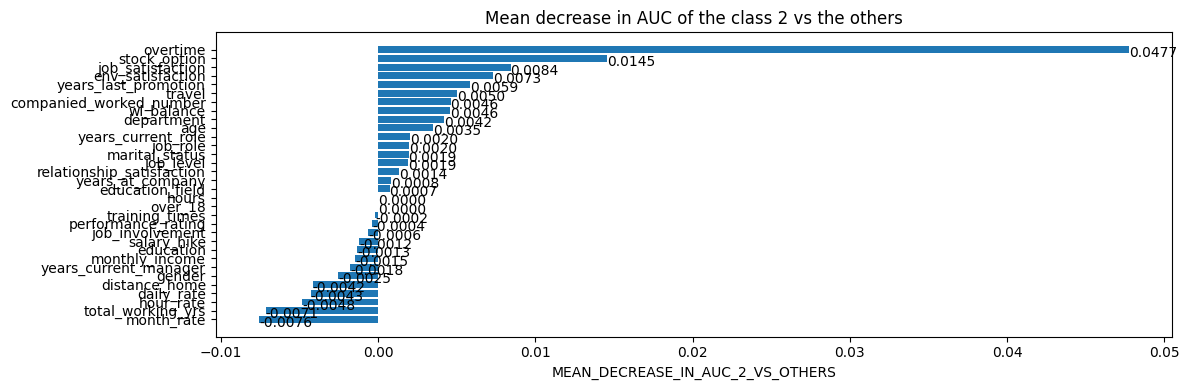

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "MEAN_DECREASE_IN_AUC_2_VS_OTHERS"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("Mean decrease in AUC of the class 2 vs the others")
plt.tight_layout()
plt.show()

In [30]:
html = tfdf.model_plotter.plot_model(model, tree_idx=0, max_depth=3)

In [36]:
print(html)


<script src="https://d3js.org/d3.v6.min.js"></script>
<div id="tree_plot_fd28bd7a54f7472e99e4fa96f6bb0989"></div>
<script>
/*
 * Copyright 2021 Google LLC.
 * Licensed under the Apache License, Version 2.0 (the "License");
 * you may not use this file except in compliance with the License.
 * You may obtain a copy of the License at
 *
 *     https://www.apache.org/licenses/LICENSE-2.0
 *
 * Unless required by applicable law or agreed to in writing, software
 * distributed under the License is distributed on an "AS IS" BASIS,
 * WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
 * See the License for the specific language governing permissions and
 * limitations under the License.
 */

/**
 *  Plotting of decision trees generated by TF-DF.
 *
 *  A tree is a recursive structure of node objects.
 *  A node contains one or more of the following components:
 *
 *    - A value: Representing the output of the node. If the node is not a leaf,
 *      the value is only 

In [17]:
# index_resp = list(df.index);
# attrition_resp = list(df['attrition']);

In [18]:
# ## Set up a global model configuration parameter ##
# TRAIN_SPLIT = 0.8;

In [19]:
# ## Create a numpy array for each dependent and independent variable in association to the attrition outcome. ##
# month_age = pd.DataFrame({"attrition":df['attrition'], "age":df['age']}).to_numpy();

In [20]:
# ## Compute the size of the training and testing datasets. ##
# training_size = int(TRAIN_SPLIT * row_count);

In [21]:
# ## Run shuffling and random seed to ensure a reproducibility and split the data into training and validating dataset. ##
# np.random.shuffle(month_age);
# train_data, test_data = month_age[:training_size], month_age[training_size:];